The **AD–AS model**, Aggregate Demand–Aggregate Supply is an aggregation of the elementary microeconomic demand-and-supply model. 

The AD curve can be obtained from the IS–LM curves, by removing the fixed price level, representing the set of output and price level combinations that guarantee equilibrium of goods and services and monetary markets. 

The AS curve represents the set of output and price level combinations that maximise profits of firms. 

The equilibrium levels of the main variables, GDP and price level, P, are determined by the interaction of the AD and AS curves.

This model can be used to study the effect of changes either in policy variables or in the specification of the interaction between endogenous variables: 

- product equals aggregate demand, $Y = C + I +G$; 

- consumption function, $C = \bar C + c(Y-T)$; 

- investment function, $I = \bar I - br$; 

- public spending function, $G = \bar G$;

- income taxes function, $T = tY$; 

- money demand, $L = \bar L + kY - hr$; 

- money supply function, $ \bar M/ P$.

- production function, $Y = \bar A \bar K^{\alpha} H^{1- \alpha}$

## Endogenous variables: 

- product, $Y$;

- consumption, $C$; 

- investment, $I$;

- income taxes, $T$;

- interest rate, $r$;

- prices, $P$.

## Exogenous variables: 

- government/public spending, $\bar G$; 

- independent/autonomous consumption, $\bar C$; 

- independent/autonomous investment, $\bar I$; 

- independent/autonomous money demand, $\bar L$; 

- money supply, $\bar M$; 

- nominal wages,$\bar  W$; 

- capital, $\bar K$; 

- total factor productivity, $\bar A$.

## Parameters:

- $c$ is the propensity to consume, $0 < c < 1$; 

- $b > 0$ is the interest sensitivity of investment; 

- $k > 0$ is the output sensitivity of the demand for money; 

- $h > 0$ is the interest sensitivity of the demand for money.

- $t ≥ 0$ is the tax rate; 

- $0 < \alpha < 1$ is the capital share of output;

### AD curve: aggregate demand

The AD curve represents the various amounts of real GDP, IS-LM equilibrium output, that buyers will desire to purchase at each possible price level


$$Y = \frac{ \frac{1}{h} (\bar L - \frac{\bar M}{P}) - \frac{1}{b} (\bar C + \bar I + \bar G  )}{  \frac{c(1-t)-1}{b} - \frac{k}{h}}$$





Representing (Y, P), respectively, in the x–axis and y–axis, it can be stated that:

- the position of the AD curve is affected by any factor that affects the position of IS and LM curves; 

-  $ \frac{∂Y}{∂P} < 0$ (negative slope);

- points on the left (right) side of the curve imply excess (scarcity) of aggregate demand.


### AS curve: aggregate supply

The AS curve represents the real domestic output level that is supplied in the economy at different price levels.
Typically it is thought to have three distinct segments:


- **Horizontal range**: the price level remains constant, $P =\bar P$, with substantial output variation, and the economy is far from full employment – Keynesian (or short-run aggregate supply) curve (implicit in the IS–LM model). 


- **Intermediate (upward sloping) range**: the expansion of real output is accompanied by a rising price level, near to a full employment level – the hybrid (or intermediate or medium-run aggregate supply) curve (ASmr),

$$Y = \bar A \bar K^{\alpha} \left( \frac{\bar W}{P} \frac{\bar K^{-\alpha}}{(1-\alpha) \bar A } \right)^{\frac{\alpha -1}{\alpha}}  $$


   a. $AS_{mr}$ position depends on a change in input prices, change in productivity and change in legal institutional environment; 
   
   b. $\frac{∂Y}{∂P} > 0$ (positive slope).



- **Vertical range**: absolute full capacity is assumed and full employment occurs at the ‘natural rate of unemployment’, $Y = Y^N$ – *Classical* AS (or long-run aggregate supply) curve.

#### Putting the AD and the AS curves together


- Equilibrium price and quantity are found where the AD and AS curves intersect.

- If the AD curve shifts right, in the intermediate and vertical AS curve ranges it will cause demand-pull inflation, whereas in the horizontal range it will only cause output changes. 

- The multiplier effect is weakened by price level changes in intermediate and vertical AS curve ranges: the more the price level increases, the smaller the effect on real GDP is.

## AD−AS model

In [2]:
import numpy as np
import math
import scipy.optimize as opt
import matplotlib.pyplot as plt
# AD−AS model
# Medium−run equilibrium
# Parameters 
c = 0.6   # marginal propensity to consume
b = 1500  # sensitivity of investment to the interest rate 
k = 0.2  # sensitivity of the money demand to the product 
h = 1000 # sensitivity of the money demand to the interest rate 
t = 0.2  # income tax rate
alpha = 0.5  # capital share in production (not realistic, but consistent with some textbooks)
aux = (c*(1- t)-1)/b - k/h # auxiliary variable for AD curve
# Exogenous variables
G_bar = 200  # government spending 
M_bar = 1000 # money supply 
W_bar = 50 # nominal wage 
K_bar = 30000 # stock of capital
A_bar = 1 # exogenous productivity
# Autonomous components
C_bar = 160  # autonomous consumption 
I_bar = 100 # autonomous investment 
L_bar = 225 # autonomous money demand
# Endogenous variables 
# Y, GDP 
# P, price
# AD−AS model as a system of non-linear equations 
def ADAS_system(variables):
    """
    System of non-linear equations for AD-AS model
    exogenous variables (autonomous components )
        global C_bar I_bar G_bar M_bar W_bar L_bar A_bar K_bar b h alpha aux 
    endogenous variables:
        Y, GDP: 
        P, price: 
    """
    (Y,P) = variables
    # global C_bar, I_bar, G_bar, M_bar, W_bar, L_bar, A_bar, K_bar, b, h, c, k, alpha, aux
    # if we want to change the value of global variables
    # aux = (c*(1- t)-1)/b - k/h # auxiliary variable for AD curve
    # f = np.zeros(2) # # This is the function whose zero we want to find
    AD_eq = Y-1/h*(L_bar-M_bar / P)/ aux+1/b*(C_bar+I_bar+G_bar )/aux
    AS_eq = Y - A_bar*K_bar**alpha * (W_bar/P * K_bar**(-alpha)/((1-alpha)*A_bar))**((alpha-1)/alpha)
    return [AD_eq, AS_eq]


###  Model solution: compute the endogenous variables

In [2]:
# Model solution: compute the endogenous variables 
Y0, P0 = (500, 5) # initial guesses for Y and P, respectively
Ystar,Pstar = opt.fsolve(ADAS_system, (Y0, P0 ) )
# Display the solution 
print( 'Computed endogenous variables:\n') 
print('GDP, Y = {0:.2f}， \
       \nPrice, P = {1:.2f}'.format(Ystar,Pstar)) 
# Show variable of interest                                        
Rstar = 1/h * (L_bar - M_bar/Pstar + k*Ystar) 
print('Interest rate(%), r = {0:.2f}'.format(Rstar*100))

Computed endogenous variables:

GDP, Y = 819.25，        
Price, P = 2.73
Interest rate(%), r = 2.27


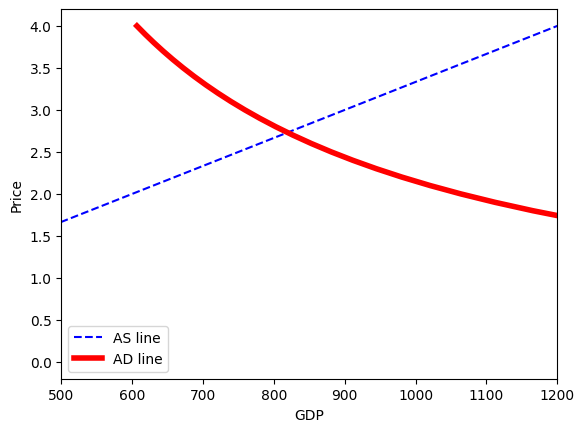

In [3]:
# Plot the solution 
P = np.arange(0.0001 , 1.5*Pstar, step =0.1)
AS = A_bar*K_bar**alpha*(W_bar/P * K_bar**(-alpha)/((1-alpha)*A_bar))** ((alpha-1)/alpha)
AD = 1/h*(L_bar-M_bar/P)/aux  -  1/b*(C_bar + I_bar + G_bar )/aux     
plt.figure(num=1)
l1 = plt.plot(AS,P, '--b', label='AS line')
l2 = plt.plot(AD,P, color='red', linewidth=4.0, linestyle='-', label='AD line')
plt.xlim((500 ,1200));
plt.xlabel('GDP');
plt.ylabel('Price');
plt.legend();   


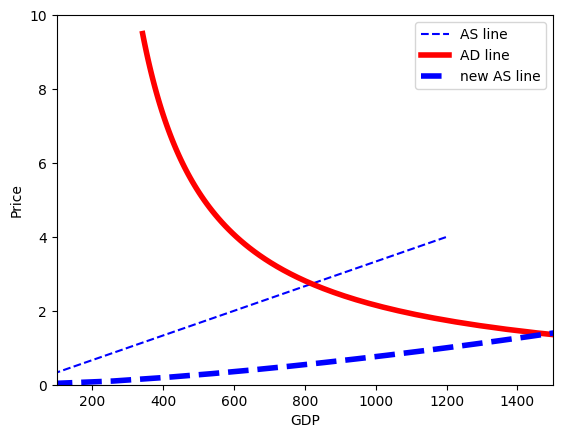

In [6]:
# Plot a different case
alpha_new = 0.6  # capital share in production (less realistic, but makes the AS non-linear too)
P_new = np.arange(0.0001 , 3.5*Pstar, step =0.1)
AS_new = A_bar*K_bar**alpha_new*(W_bar/P_new * K_bar**(-alpha_new)/((1-alpha_new)*A_bar))** ((alpha_new-1)/alpha_new)
AD_new = 1/h*(L_bar-M_bar/P_new)/aux  -  1/b*(C_bar + I_bar + G_bar )/aux     
plt.figure(num=1)
l1 = plt.plot(AS,P, '--b', label='AS line')
l2 = plt.plot(AD_new,P_new, color='red', linewidth=4.0, linestyle='-', label='AD line')
l3 = plt.plot(AS_new,P_new, '--b', linewidth=4.0, label='new AS line')
plt.xlim((100 ,1500));
plt.ylim((0.0 ,10));
plt.xlabel('GDP');
plt.ylabel('Price');
plt.legend();

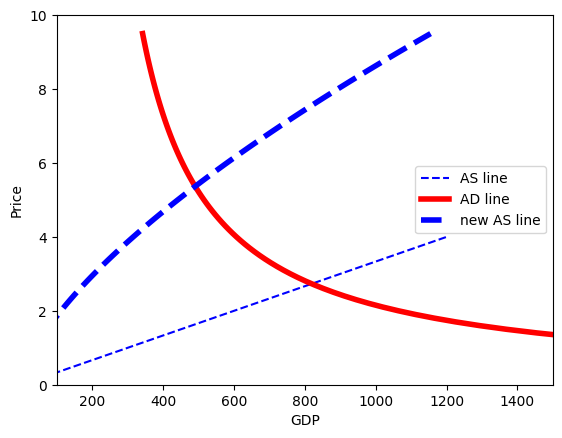

In [7]:
# Plot a different case
alpha_new = 0.40  # capital share in production (more realistic, and makes the AS non-linear too)
P_new = np.arange(0.0001 , 3.5*Pstar, step =0.1)
AS_new = A_bar*K_bar**alpha_new*(W_bar/P_new * K_bar**(-alpha_new)/((1-alpha_new)*A_bar))** ((alpha_new-1)/alpha_new)
AD_new = 1/h*(L_bar-M_bar/P_new)/aux  -  1/b*(C_bar + I_bar + G_bar )/aux     
plt.figure(num=1)
l1 = plt.plot(AS,P, '--b', label='AS line')
l2 = plt.plot(AD_new,P_new, color='red', linewidth=4.0, linestyle='-', label='AD line')
l3 = plt.plot(AS_new,P_new, '--b', linewidth=4.0, label='new AS line')
plt.xlim((100 ,1500));
plt.ylim((0.0 ,10));
plt.xlabel('GDP');
plt.ylabel('Price');
plt.legend();

In [8]:
# Calibrate a "free parameter"
A_bar_cal = 1 # exogenous productivity
# AD−AS model as a system of non-linear equations 
def ADAS_system_cal(variables):
    """
    System of non-linear equations for AD-AS model
    exogenous variables (autonomous components ) 
        global C_bar I_bar G_bar M_bar W_bar L_bar A_bar K_bar b h alpha aux 
    
    endogenous variables:
        Y, GDP: 
        P, price:   
    """
    (Y,P) =variables
    # global C_bar, I_bar, G_bar, M_bar, W_bar, L_bar, A_bar, K_bar, b, h, c, k, alpha, aux
    # if we want to change the value of global variables
    # aux = (c*(1- t)-1)/b - k/h # auxiliary variable for AD curve
    # f = np.zeros(2) # # This is the function whose zero we want to find
    AD_eq_cal = Y-1/h*(L_bar-M_bar / P)/ aux+1/b*(C_bar+I_bar+G_bar )/aux
    AS_eq_cal = Y - A_bar_cal*K_bar**alpha * (W_bar/P * K_bar**(-alpha)/((1-alpha)*A_bar_cal))**((alpha-1)/alpha)
    return [AD_eq_cal, AS_eq_cal]
# Model solution: compute the endogenous variables 
Y0, P0 = (500, 5) # initial guesses for Y and P, respectively
Ystarcal,Pstarcal = opt.fsolve(ADAS_system_cal, (Y0, P0 ) )
Pstarcal

2.7308285936332948

### Expansion of governmental spending (G increases by 20%)

G_bar from 200 to 240

Computed endogenous variables:

-----------------------------------------------------------

new GDP, Y = 846.48，        
new Price, P = 2.82
new interest rate(%), r = 3.99


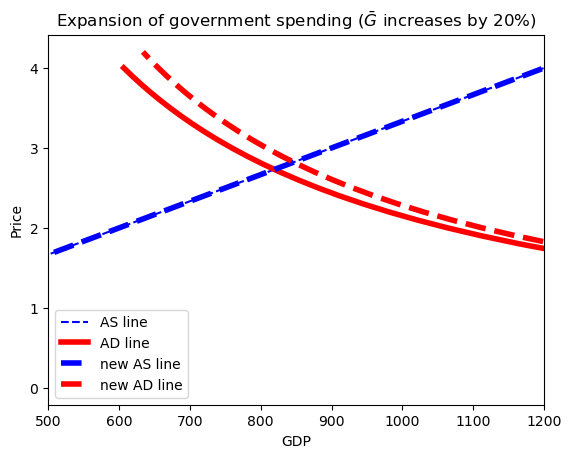

In [23]:

# Change G_bar from 200 to 240

G_bar = 240
# Model solution: compute the endogenous variables 
Y0, P0 = (500, 5) # initial guess for Y and P, respectively 
newYstar,newPstar = opt.fsolve(ADAS_system, (Y0, P0 ) ) 
# Show the solution 
print( 'Computed endogenous variables:\n') 
print('-----------------------------------------------------------\n')
print('new GDP, Y = {0:.2f}， \
       \nnew Price, P = {1:.2f}'.format(newYstar,newPstar)) 

# Show variable of interest                                        

newRstar = 1/h * (L_bar - M_bar/newPstar + k*newYstar) 

print('new interest rate(%), r = {0:.2f}'.format(newRstar*100)) 

# Plot the solution 

newP = np.arange(0.0001 , 1.5*newPstar, step =0.1)
newAS = A_bar*K_bar**alpha*(W_bar/newP * K_bar**(-alpha)/((1-alpha)*A_bar))** ((alpha-1)/alpha)
newAD = 1/h*(L_bar-M_bar/newP)/aux  -  1/b*(C_bar + I_bar + G_bar )/aux 
plt.figure(num=2)
l1 = plt.plot(AS,P, '--b', label='AS line')
l2 = plt.plot(AD,P, color='red', linewidth=4.0, linestyle='-', label='AD line')
l3 = plt.plot(newAS,newP, '--b', linewidth=4.0, label='new AS line')
l4 = plt.plot(newAD,newP, color='red', linewidth=4.0, linestyle='--', label='new AD line')
plt.xlim((500 ,1200));
plt.xlabel('GDP');
plt.ylabel('Price');
plt.title(r'Expansion of government spending ($\bar G$ increases by 20%)')
plt.legend();
plt.show();

### Expansion of money supply (M increases by 20%)

Computed endogenous variables:

-----------------------------------------------------------

new GDP, Y = 889.63，        
new Price, P = 2.97
new interest rate(%), r = -0.17


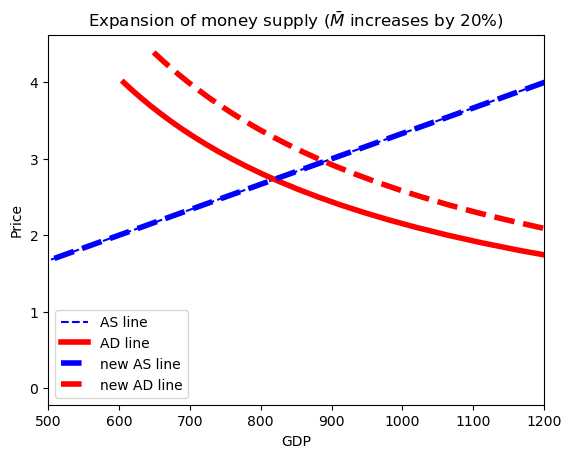

In [25]:

# Change M_bar from 1000 to 1200

G_bar = 200
M_bar = 1200
# Model solution: compute the endogenous variables 
Y0, P0 = (500, 5) # initial guess for Y and P, respectively 
newYstar,newPstar = opt.fsolve(ADAS_system, (Y0, P0 ) ) 
# Show the solution 
print( 'Computed endogenous variables:\n') 
print('-----------------------------------------------------------\n')
print('new GDP, Y = {0:.2f}， \
       \nnew Price, P = {1:.2f}'.format(newYstar,newPstar)) 

# Show variable of interest                                        

newRstar = 1/h * (L_bar - M_bar/newPstar + k*newYstar) 

print('new interest rate(%), r = {0:.2f}'.format(newRstar*100)) 

# Plot the solution 

newP = np.arange(0.0001 , 1.5*newPstar, step =0.1)
newAS = A_bar*K_bar**alpha*(W_bar/newP * K_bar**(-alpha)/((1-alpha)*A_bar))** ((alpha-1)/alpha)
newAD = 1/h*(L_bar-M_bar/newP)/aux  -  1/b*(C_bar + I_bar + G_bar )/aux 
plt.figure()
l1 = plt.plot(AS,P, '--b', label='AS line')
l2 = plt.plot(AD,P, color='red', linewidth=4.0, linestyle='-', label='AD line')
l3 = plt.plot(newAS,newP, '--b', linewidth=4.0, label='new AS line')
l4 = plt.plot(newAD,newP, color='red', linewidth=4.0, linestyle='--', label='new AD line')
plt.xlim((500 ,1200));
plt.xlabel('GDP');
plt.ylabel('Price');
plt.title(r'Expansion of money supply ($\bar M$ increases by 20%)')
plt.legend();
plt.show();

### A positive supply shock (A increases by 5%) 

A_bar from 1 to 1.05

Computed endogenous variables:

-----------------------------------------------------------

new GDP, Y = 856.11，        
new Price, P = 2.59
new interest rate(%), r = 0.99


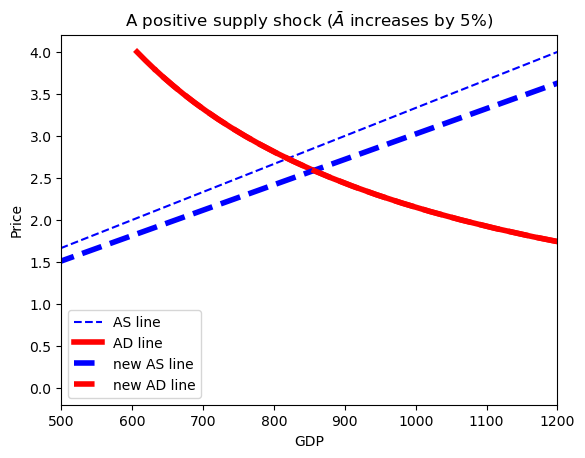

In [26]:

# Change A_bar from 1 to 1.05

G_bar = 200
M_bar = 1000
A_bar = 1.05
# Model solution: compute the endogenous variables 
Y0, P0 = (500, 5) # initial guess for Y and P, respectively 
newYstar,newPstar = opt.fsolve(ADAS_system, (Y0, P0 ) ) 
# Show the solution 
print( 'Computed endogenous variables:\n') 
print('-----------------------------------------------------------\n')
print('new GDP, Y = {0:.2f}， \
       \nnew Price, P = {1:.2f}'.format(newYstar,newPstar)) 

# Show a variable of interest                                        

newRstar = 1/h * (L_bar - M_bar/newPstar + k*newYstar) 

print('new interest rate(%), r = {0:.2f}'.format(newRstar*100)) 

# Plot the solution 

newP = np.arange(0.0001 , 1.5*newPstar, step =0.1)
newAS = A_bar*K_bar**alpha*(W_bar/newP * K_bar**(-alpha)/((1-alpha)*A_bar))** ((alpha-1)/alpha)
newAD = 1/h*(L_bar-M_bar/newP)/aux  -  1/b*(C_bar + I_bar + G_bar )/aux 
plt.figure()
l1 = plt.plot(AS,P, '--b', label='AS line')
l2 = plt.plot(AD,P, color='red', linewidth=4.0, linestyle='-', label='AD line')
l3 = plt.plot(newAS,newP, '--b', linewidth=4.0, label='new AS line')
l4 = plt.plot(newAD,newP, color='red', linewidth=4.0, linestyle='--', label='new AD line')
plt.xlim((500 ,1200));
plt.xlabel('GDP');
plt.ylabel('Price');
plt.title(r'A positive supply shock ($\bar A$ increases by 5%) ')
plt.legend();
plt.show();

### Conclusions

- The AD–AS model studies the determination of the price level and output considering the relationship between aggregate demand and aggregate supply. 

- The AD curve is defined by the IS–LM equilibrium and the AS curve reflects the labour market. 

- Iterative numerical methods for nonlinear problems are introduced.

- Newton and quasi-Newton methods for the approximate solution of nonlinear (system of) equation(s) are briefly explained.

## Plot before and after Policy change

In [ ]:
def AD_AS_model(A_bar = 1,K_bar = 30000, C_bar = 160, I_bar = 100, G_bar = 200, M_bar = 1000, W_bar = 50 ,L_bar = 225,
               newA_bar = 1, newG_bar = 200, newM_bar = 1000, newTitle = r'A positive supply shock ($\bar A$ increases 5%) '):
    """
    Solve AD-AS model and plot the policy change
    #### parameters 
    #global C_bar I_bar G_bar M_bar W_bar L_bar A_bar K_bar b h c k alpha aux # if we want to change the value of global variables
    
    ## exogenous variables (autonomous components ) 
    A_bar = 1 # exogenous productivity
    K_bar = 30000 # stock of capital 
    C_bar = 160  # autonomous consumption 
    I_bar = 100 # autonomous investment 
    G_bar = 200  # government spending 
    M_bar = 1000 # money supply 
    W_bar = 50 # wage 
    L_bar = 225 # autonomous money demand 
    
    """
    ### parameters 
    c = 0.6   # marginal propensity to consume

    b = 1500  # sensitivity of the investment to the interest rate 

    k = 0.2  # sensitivity of the money demand to the product 

    h = 1000 # sensitivity of the money demand to the interest rate 

    t = 0.2  # tax on consumption

    alpha = 0.5  # capital share in production

    aux = (c*(1- t)-1)/b - k/h # auxiliary variable for AD curve
    ## show the parameter 
    print( 'parameters:\n') 
    print('-----------------------------------------------------------\n')
    print('marginal propensity to consume, c = {0:.2f}， \
           \nsensibility of the investment to the interest rate, b = {1:.2f}, \
          \nsensibility of the money demand to the product, k = {2:.2f}, \
          \nsensibility of the money demand to the interest rate, h = {3:.2f},\
          \ntax on consumption, t = {4:.2f}, \
          \ncapital share in production, alpha = {5:.2f}'.format(c,b,k,h,t,alpha))
    
    ## AD−AS system 
    ## namespace need to be reconstructed every time
    def ADAS_system(variables):
        """
        System of non-linear equations for AD-AS model

        exogenous variables (autonomous components ) 
            global C_bar I_bar G_bar M_bar W_bar L_bar A_bar K_bar b h alpha aux 

        endogenous variables:
            Y, GDP: 
            P, Price: 

        """
        (Y,P) =variables

        # global C_bar, I_bar, G_bar, M_bar, W_bar, L_bar, A_bar, K_bar, b, h, c, k, alpha, aux # if we want to change the value of global variables
        # aux = (c*(1- t)-1)/b - k/h # auxiliary variable for AD curve

        # f = np.zeros(2) # # This is the function that we want to make 0

        AD_eq = Y-1/h*(L_bar-M_bar / P)/ aux+1/b*(C_bar+I_bar+G_bar )/aux
        AS_eq = Y - A_bar*K_bar**alpha * (W_bar/P * K_bar**(-alpha)/((1-alpha)*A_bar))**((alpha-1)/alpha)

        return [AD_eq, AS_eq]
    
    
    ## model solution : compute the endogenous variables 
    Y0, P0 = (500, 5) # initial guess for Y and P, respectively 
    
    Ystar,Pstar = opt.fsolve(ADAS_system, (Y0, P0 ) ) 
    ## show the solution 
    print( 'computed endogenous variables:\n') 
    print('-----------------------------------------------------------\n')
    print('GDP, Y = {0:.2f}， \
           \nPrice, P = {1:.2f}'.format(Ystar,Pstar)) 

    # show variable of interest                                        

    Rstar = 1/h * (L_bar - M_bar/Pstar + k*Ystar) 

    print('interest rate(%), r = {0:.2f}'.format(Rstar*100)) 
    
    ## plot the solution 

    P = np.arange(0.0001 , 1.5*Pstar, step =0.1)
    AS = A_bar*K_bar**alpha*(W_bar/P * K_bar**(-alpha)/((1-alpha)*A_bar))** ((alpha-1)/alpha)
    AD = 1/h*(L_bar-M_bar/P)/aux  -  1/b*(C_bar + I_bar + G_bar )/aux 
    ## plot the solution     
    plt.figure()
    l1 = plt.plot(AS,P, '--b', label='AS line')
    l2 = plt.plot(AD,P, color='red', linewidth=4.0, linestyle='-', label='AD line')    
    # A_bar from 1 to 1.05

    G_bar = newG_bar
    M_bar = newM_bar
    A_bar = newA_bar
    ## model solution : compute the endogenous variables 
    Y0, P0 = (500, 5) # initial guess for Y and P, respectively 
    newYstar,newPstar = opt.fsolve(ADAS_system, (Y0, P0 ) ) 
    ## show the solution 
    print( 'Computed endogenous variables:\n') 
    print('-----------------------------------------------------------\n')
    print('new GDP, Y = {0:.2f}， \
           \nnew Price, P = {1:.2f}'.format(newYstar,newPstar)) 

    # show variable of interest                                        

    newRstar = 1/h * (L_bar - M_bar/newPstar + k*newYstar) 

    print('new interest rate(%), r = {0:.2f}'.format(newRstar*100)) 


    newP = np.arange(0.0001 , 1.5*newPstar, step =0.1)
    newAS = A_bar*K_bar**alpha*(W_bar/newP * K_bar**(-alpha)/((1-alpha)*A_bar))** ((alpha-1)/alpha)
    newAD = 1/h*(L_bar-M_bar/newP)/aux  -  1/b*(C_bar + I_bar + G_bar )/aux 
    
    ## plot the new solution     
    l3 = plt.plot(newAS,newP, '--b', linewidth=4.0, label='new AS line')
    l4 = plt.plot(newAD,newP, color='red', linewidth=4.0, linestyle='--', label='new AD line')
    plt.xlim((500 ,1200));
    plt.xlabel('GDP');
    plt.ylabel('Price');
    plt.title(newTitle)
    plt.legend();



In [ ]:
AD_AS_model(A_bar = 1,K_bar = 30000, C_bar = 160, I_bar = 100, G_bar = 200, M_bar = 1000, W_bar = 50 ,L_bar = 225,
            newA_bar = 1.05, newG_bar = 200, newM_bar = 1000, newTitle = r'A positive supply shock ($\bar A$ increases 5%) ')

## Interactive Plotting

In [ ]:
def AD_AS(A_bar = 1,K_bar = 30000, C_bar = 160, I_bar = 100, G_bar = 200, M_bar = 1000, W_bar = 50 ,L_bar = 225 ):
    """
    Solve AD-AS model and plot the policy change
    #### parameters 
    #global C_bar I_bar G_bar M_bar W_bar L_bar A_bar K_bar b h c k alpha aux # if we want to change the value of global variables
    
    ## exogenous variables (autonomous components ) 
    A_bar = 1 # exogenous productivity
    K_bar = 30000 # stock of capital 
    C_bar = 160  # autonomous consumption 
    I_bar = 100 # autonomous investment 
    G_bar = 200  # government spending 
    M_bar = 1000 # money supply 
    W_bar = 50 # wage 
    L_bar = 225 # autonomous money demand 
    
    """
    ### parameters 
    c = 0.6   # marginal propensity to consume

    b = 1500  # sensitivity of the investment to the interest rate 

    k = 0.2  # sensitivity of the money demand to the product 

    h = 1000 # sensitivity of the money demand to the interest rate 

    t = 0.2  # tax on consumption

    alpha = 0.5  # capital share in production

    aux = (c*(1- t)-1)/b - k/h # auxiliary variable for AD curve
    ## show the parameter 
    print( 'parameters:\n') 
    print('-----------------------------------------------------------\n')
    print('marginal propensity to consume, c = {0:.2f}， \
           \nsensibility of the investment to the interest rate, b = {1:.2f}, \
          \nsensibility of the money demand to the product, k = {2:.2f}, \
          \nsensibility of the money demand to the interest rate, h = {3:.2f},\
          \ntax on consumption, t = {4:.2f}, \
          \ncapital share in production, alpha = {5:.2f}'.format(c,b,k,h,t,alpha))
    
    ## AD−AS system 
    ## namespace need to be reconstructed every time
    def ADAS_system(variables):
        """
        System of non-linear equations for AD-AS model

        exogenous variables (autonomous components ) 
            global C_bar I_bar G_bar M_bar W_bar L_bar A_bar K_bar b h alpha aux 

        endogenous variables:
            Y, GDP: 
            P, Price: 

        """
        (Y,P) =variables

        # global C_bar, I_bar, G_bar, M_bar, W_bar, L_bar, A_bar, K_bar, b, h, c, k, alpha, aux # if we want to change the value of global variables
        # aux = (c*(1- t)-1)/b - k/h # auxiliary variable for AD curve

        # f = np.zeros(2) # # This is the function that we want to make 0

        AD_eq = Y-1/h*(L_bar-M_bar / P)/ aux+1/b*(C_bar+I_bar+G_bar )/aux
        AS_eq = Y - A_bar*K_bar**alpha * (W_bar/P * K_bar**(-alpha)/((1-alpha)*A_bar))**((alpha-1)/alpha)

        return [AD_eq, AS_eq]
    
    
    ## model solution : compute the endogenous variables 
    Y0, P0 = (500, 5) # initial guess for Y and P, respectively 
    
    Ystar,Pstar = opt.fsolve(ADAS_system, (Y0, P0 ) ) 
    ## show the solution 
    print( 'Computed endogenous variables:\n') 
    print('-----------------------------------------------------------\n')
    print('GDP, Y = {0:.2f}， \
           \nPrice, P = {1:.2f}'.format(Ystar,Pstar)) 

    # show variable of interest                                        

    Rstar = 1/h * (L_bar - M_bar/Pstar + k*Ystar) 

    print('interest rate(%), r = {0:.2f}'.format(Rstar*100)) 
    
    ## plot the solution 

    P = np.arange(0.0001 , 1.5*Pstar, step =0.1)
    AS = A_bar*K_bar**alpha*(W_bar/P * K_bar**(-alpha)/((1-alpha)*A_bar))** ((alpha-1)/alpha)
    AD = 1/h*(L_bar-M_bar/P)/aux  -  1/b*(C_bar + I_bar + G_bar )/aux 
    plt.figure()
    l1 = plt.plot(AS,P, '--b', label='AS line')
    l2 = plt.plot(AD,P, color='red', linewidth=4.0, linestyle='-', label='AD line')
    
    plt.annotate(r'$Y^*$ = {0:.2f},$P^*$ = {1:.2f}'.format(Ystar,Pstar), xy=(Ystar,Pstar), xytext=(Ystar*1.1,Pstar*1.1),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
    
    plt.xlim((500 ,1200));
    plt.xlabel('GDP');
    plt.ylabel('Price');
    plt.legend();
    
    
    
    
    plt.show();


In [ ]:
AD_AS(A_bar = 1,K_bar = 30000, C_bar = 160, I_bar = 100, G_bar = 200, M_bar = 1000, W_bar = 50 ,L_bar = 225 )

In [ ]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [ ]:
#AD_AS(A_bar = 1,K_bar = 30000, C_bar = 160, I_bar = 100, G_bar = 200, M_bar = 1000, W_bar = 50 ,L_bar = 225 )
interact(AD_AS, A_bar=widgets.IntSlider(min=0.01,max=3,step=1,value=1),\
         K_bar = fixed(30000),\
         C_bar = fixed(160),\
         I_bar = fixed(100),\
         G_bar = widgets.IntSlider(min=190,max=240,step=10,value=200), \
         M_bar = widgets.IntSlider(min=1000-200,max=1000+400,step=100,value=1000),\
         W_bar = fixed(50) ,L_bar = fixed(225));
         

In [ ]:
#Check if the widget works

In [ ]:

def f(x,y):
    return x+y

In [ ]:

interact(f, x=widgets.IntSlider(min=-10,max=30,step=1,value=10), y = widgets.IntSlider(min=-10,max=30,step=1,value=10));